### 构建神经网络

加载自定义数据：

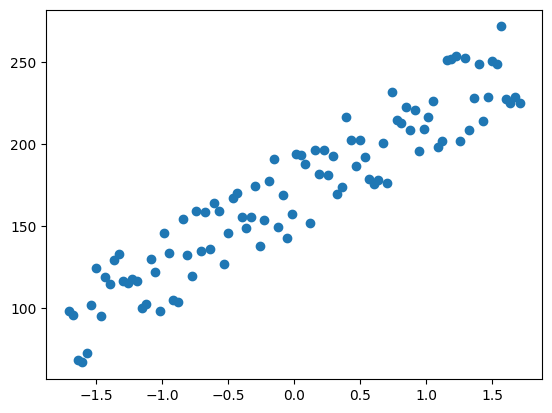

In [1]:
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch
data = pd.read_csv("data/myData/data_1d.csv")
X = torch.tensor(data['X'].values).reshape(-1, 1).float()
Y = torch.tensor(data['Y'].values).reshape(-1, 1).float()
# 数据归一化
x_mean = X.mean()
x_std = X.std()
X = (X - x_mean) / x_std
training_data = TensorDataset(X,Y)
#shuffle随机打乱
train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)
plt.scatter(X,Y)

In [2]:
import torch
from torch import nn

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


#### 定义类

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)  # 输入维度为 1，输出维度为 1

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

#### 损失函数
- nn.MSELoss：均方误差损失函数，用于回归任务。  
- nn.CrossEntropyLoss：交叉熵损失函数，用于多分类任务。  
- nn.BCELoss：二元交叉熵损失函数，用于二分类任务。  
- nn.NLLLoss：负对数似然损失函数，通常用于文本分类任务。  
- nn.KLDivLoss：KL 散度损失函数，用于计算两个概率分布之间的距离。  
- nn.SmoothL1Loss：平滑 L1 损失函数，与均方误差损失函数类似，但对离群值的惩罚更小，适用于回归任务。

In [4]:
#将模型添加到GPU
model = NeuralNetwork().to(device)
# 定义损失函数和优化器
# 均方差
criterion = torch.nn.MSELoss()
# 随机梯度下降
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# model.parameters()用于返回模型中所有可训练的参数

训练模型

In [5]:
num_epochs = 10
for epoch in range(num_epochs):
        #模型进入训练模式
        model.train()
        #遍历数据
        for batch, (inputs, targets) in enumerate(train_dataloader):
                #将数据添加到GPU
                inputs, targets = inputs.to(device), targets.to(device)
                # 前向传播
                pred = model(inputs)
                # loss计算
                loss = criterion(pred, targets)
                # 梯度清零
                optimizer.zero_grad()
                # 反向传播
                loss.backward()
                # 更新参数的值
                optimizer.step()
                # 输出数据
                print('迭代: [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

迭代: [1/10], Loss: 41332.0742
迭代: [1/10], Loss: 18312.5898
迭代: [1/10], Loss: 11513.5068
迭代: [1/10], Loss: 7394.3994
迭代: [1/10], Loss: 5566.8682
迭代: [1/10], Loss: 3659.0156
迭代: [1/10], Loss: 1456.0555
迭代: [1/10], Loss: 740.2213
迭代: [1/10], Loss: 1365.5927
迭代: [1/10], Loss: 488.0543
迭代: [2/10], Loss: 1298.4960
迭代: [2/10], Loss: 346.7413
迭代: [2/10], Loss: 267.7467
迭代: [2/10], Loss: 579.1392
迭代: [2/10], Loss: 357.8111
迭代: [2/10], Loss: 456.3907
迭代: [2/10], Loss: 353.8194
迭代: [2/10], Loss: 187.1322
迭代: [2/10], Loss: 260.7514
迭代: [2/10], Loss: 136.5156
迭代: [3/10], Loss: 255.8396
迭代: [3/10], Loss: 221.0678
迭代: [3/10], Loss: 186.3450
迭代: [3/10], Loss: 368.8568
迭代: [3/10], Loss: 223.2333
迭代: [3/10], Loss: 321.9094
迭代: [3/10], Loss: 542.9917
迭代: [3/10], Loss: 346.1207
迭代: [3/10], Loss: 281.6850
迭代: [3/10], Loss: 287.9547
迭代: [4/10], Loss: 378.2253
迭代: [4/10], Loss: 138.9463
迭代: [4/10], Loss: 402.0691
迭代: [4/10], Loss: 233.0821
迭代: [4/10], Loss: 289.7036
迭代: [4/10], Loss: 190.6734
迭代: [4/10], Loss

#### 结果可视化

直线方程为: y = 45.13x + 170.37


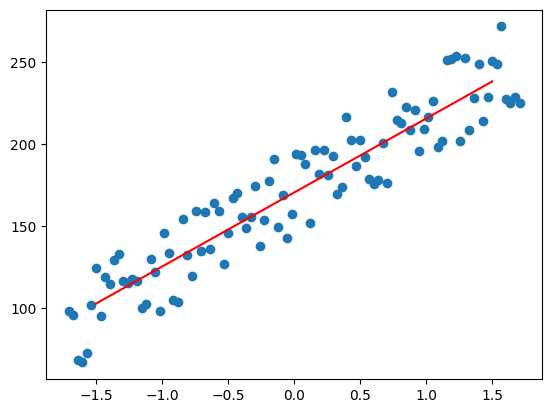

In [6]:
import numpy as np
plt.scatter(X,Y)
w, b = model.parameters()
print("直线方程为: y = {:.2f}x + {:.2f}".format(w.item(), b.item()))
plot_x = np.linspace(-1.5,1.5)
plot_y = plot_x *w.item()+b.item()
plt.plot(plot_x,plot_y,'r')